In [1]:
#https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
#import os
#os.getcwd()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure /Users/nicholasdelzingaro/git_dir/analytics/Python_Visualizations/attribute_histogram_plots


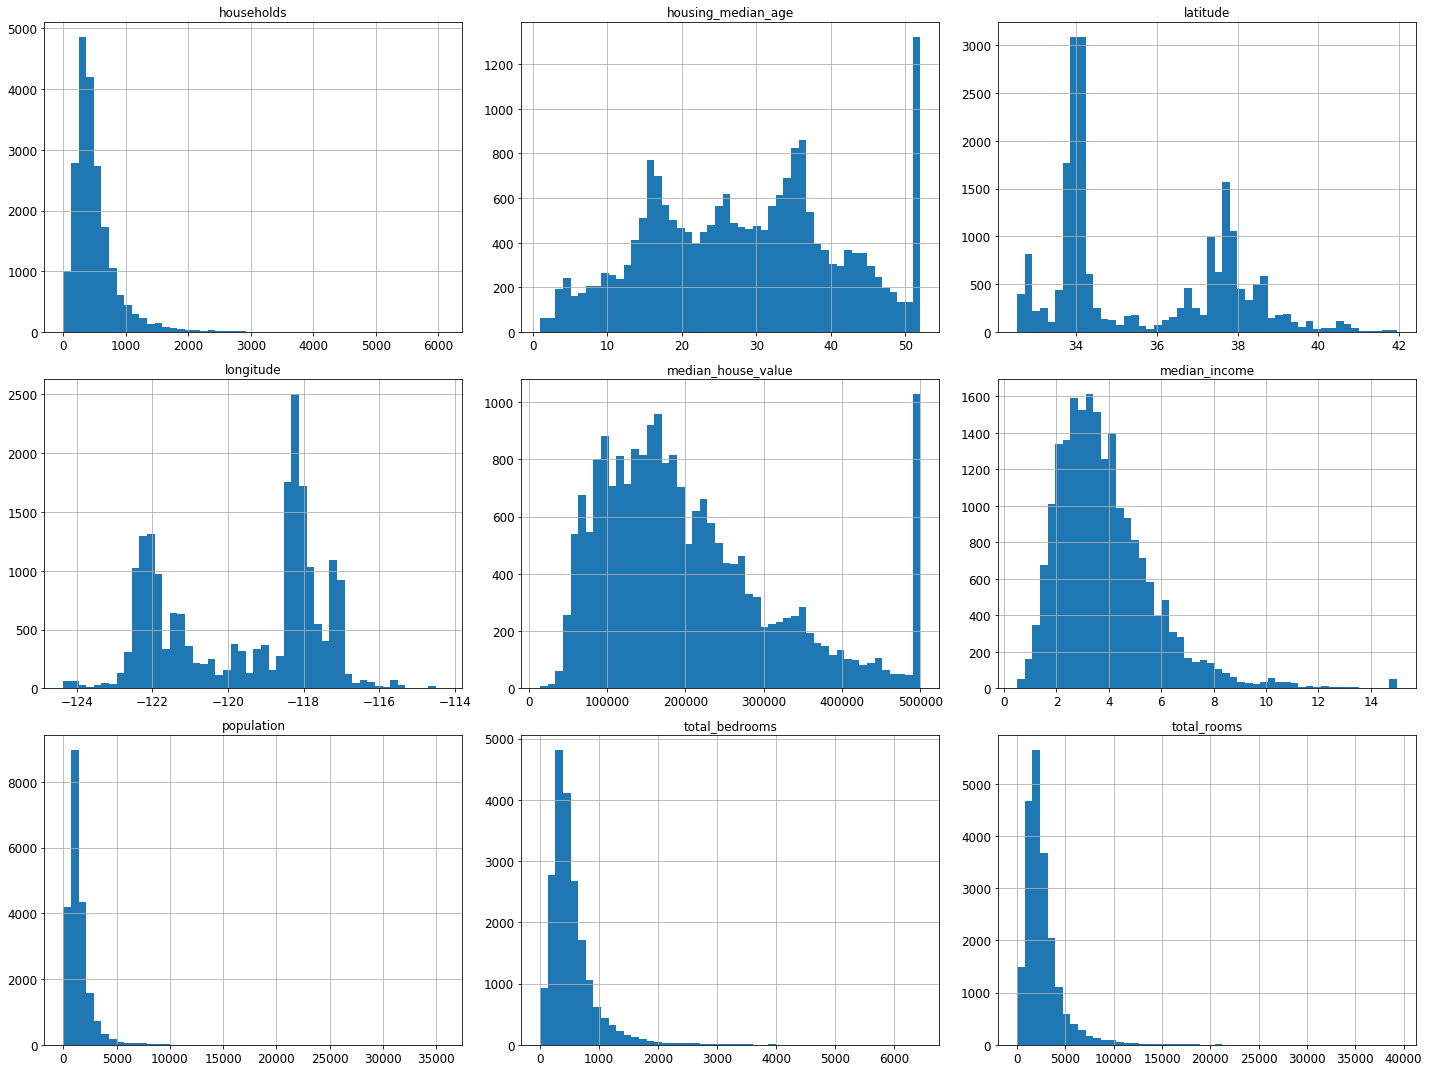

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("/Users/nicholasdelzingaro/git_dir/analytics/Python_Visualizations/attribute_histogram_plots")
plt.show()

In [50]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [59]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    #random row number array
    shuffled_indices = np.random.permutation(len(data))
    #sample row count
    test_set_size = int(len(data) * test_ratio)
    #selects the test row numbers
    test_indices = shuffled_indices[:test_set_size]
    #selects the train row numbers
    train_indices = shuffled_indices[test_set_size:]
    #iloc selects the specific rows
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [64]:
#One form of 
#from zlib import crc32

#def test_set_check(identifier, test_ratio):
 #   return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

    ###splits the datset to training and test via hashing algorithm
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [65]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [67]:
#create id with index values
housing_with_id = housing.reset_index()   # adds an `index` column
#split with previous function by index values
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [68]:
#create specific id from variables
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
#split with previous function by housing_id
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [73]:
from sklearn.model_selection import train_test_split

###just like the earlier split_train_test function but it has the random seed built in via random_state
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [74]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2.0,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2.0,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.0,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4.0,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3.0,5.492991,NaN,2.483645


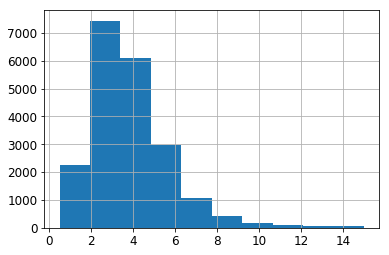

In [76]:
#histogram of median_income
housing["median_income"].hist()
#housing["median_income"].value_counts()

In [35]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [36]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

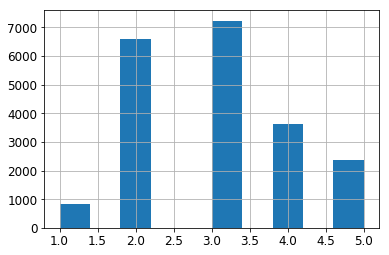

In [37]:
housing["income_cat"].hist()

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit

###Stratify by the income median category to insure there is no sampling bias.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0,6.715625,0.156972,2.275000
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0,6.388633,0.157490,2.563748
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0,4.973744,0.212532,2.408676
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0,5.546584,0.171333,3.161491
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0,5.877483,0.176901,3.533113
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,120600.0,INLAND,3.0,5.155288,0.231628,2.472557
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,72300.0,INLAND,1.0,4.092652,0.227166,2.750799
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN,5.0,6.960165,0.148017,2.741758
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,98900.0,INLAND,3.0,6.087097,0.189719,3.085484
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND,3.0,6.468750,0.212862,2.443359


In [81]:
#proportion of income median for stratified test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [82]:
#proportion of income median for total population
#notice how close it is to the above stratified set.
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [83]:
#creates the the comparison of randomnize and stratified test sets
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [84]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [85]:
#Drop the income_cat from the train and test set using loop.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

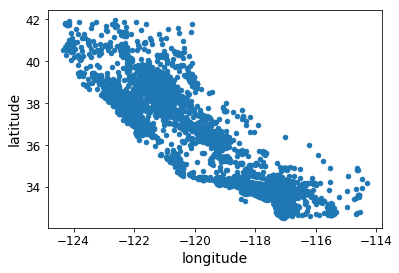

In [89]:
housing.plot(kind="scatter", x="longitude", y="latitude")
#save_fig("bad_visualization_plot")

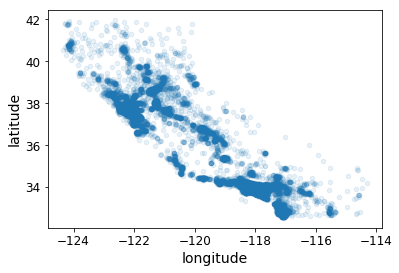

In [48]:
#allows you to see high density data points

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#save_fig("better_visualization_plot")

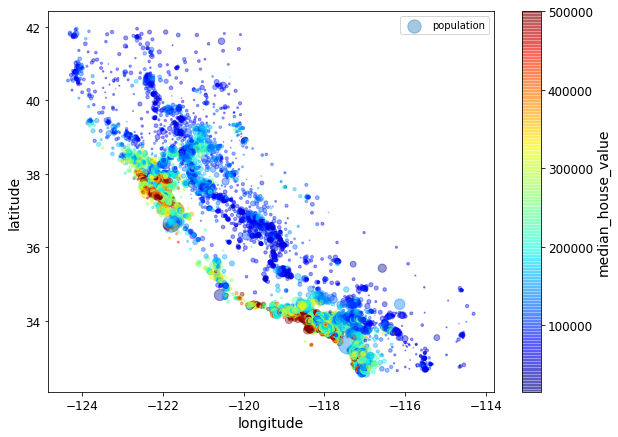

In [41]:
#size of circle is population, color is value.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [90]:
#standard correlation coefficient - Pearson's R
#runs entire table
corr_matrix = housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [43]:
#Select the linear correlation values concerning the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115862510>,
      dtype=object)

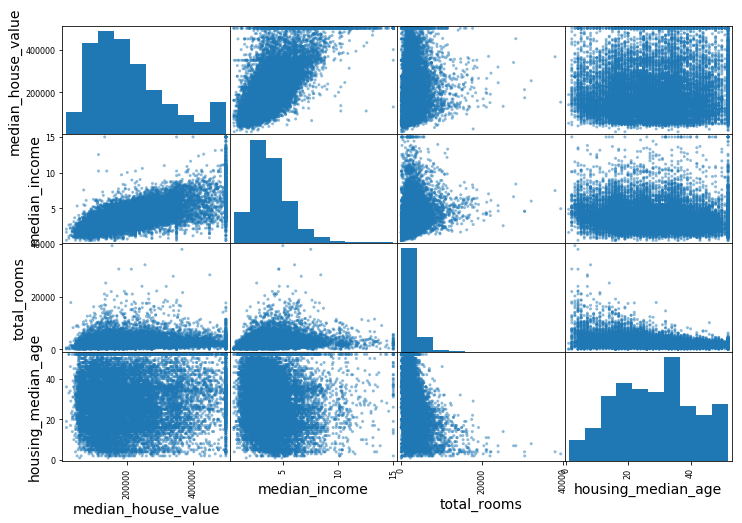

In [91]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
#plots every numerical attribute against every other numerical attribute
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

[0, 16, 0, 550000]

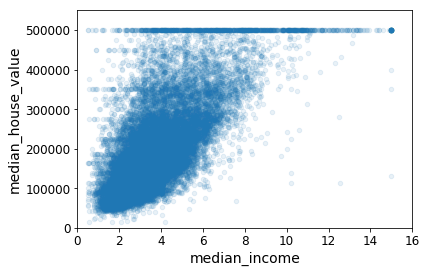

In [44]:
#take a dive into the median income & median house value plot which shows the most promise
#Noticeable ceiling for the 500,000 values and some other values.
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#save_fig("income_vs_house_value_scatterplot")

In [95]:
#rooms per households
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
#bedrooms per rooms
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#population per household
housing["population_per_household"]=housing["population"]/housing["households"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [96]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#lower bedroom/room ration tend to be more higher value
#higher room/household corrlate to be more higher value

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

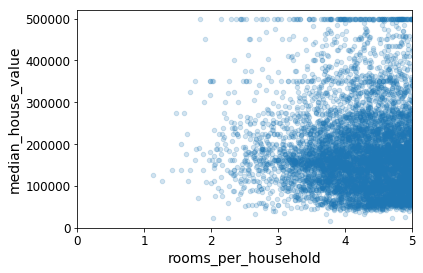

In [98]:
#plotting the rooms per household by median home value
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [61]:
#descriptive statistics excluding NANs
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [137]:
###Prepare the data for machine learning
#remove the median house value
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
#create vector of the valuables with id row
housing_labels = strat_train_set["median_house_value"].copy()

In [138]:
#fit the imputer on the dataset set
imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy=u'median',
    verbose=0)

In [139]:
#selects any row with NaN- look at sample
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,4.866192,NaN,2.468327


In [140]:
#Choice 1, Drop NaNs in total bedrooms
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [141]:
#Choice 1, Drop columns total_bedrooms with NaNs
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,4.866192,NaN,2.468327


In [142]:
#Option 3, place the median for the NAs
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,4.866192,NaN,2.468327


In [146]:
#Imputer is a nice tool to replace missing values
from sklearn.preprocessing import Imputer
#replace with median values
imputer = Imputer(strategy="median")

In [149]:
#Create a copy and dropped column without numeric values
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

Imputer(axis=0, copy=True, missing_values='NaN', strategy=u'median',
    verbose=0)

In [150]:
#median values calculated from imputer
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [151]:
#median values from training set
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [152]:
#save the trained imputer 
X = imputer.transform(housing_num)

In [153]:
#implement the trained imputer on a dataframe / index includes the index values from housing index
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [154]:
#selecting the sample rows.. filled with the median values for NA
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.571135,0.203031,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,6.371389,0.203031,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,5.064767,0.203031,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,5.511509,0.203031,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,4.866192,0.203031,2.468327


In [155]:
#provides the imputer strategy
imputer.strategy

u'median'

In [156]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847


In [157]:
#sample of the ocean proximity categories
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [161]:
#Factorize the categorical variable. there is the LabelEncoder version or the factorize version
#housing_cat_encoded, housing_categories = housing_cat.factorize()
#housing_cat_encoded[:10]

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [129]:
#housing_categories
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [130]:
#OneHotEncoder is going to create binary attributes for each category for the model. 
#Such that <1H Ocean will be either 1 or 0.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [131]:
#Calls the SciPy matrix to NumPy
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [162]:
#instead of using the label encoder to change categorical to numeric
# And OneHotEncoder to one-hot vectors... We can use LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [163]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [164]:
#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [165]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [166]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [88]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [180]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index, tells function which columns to use for calculations
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

#bascially calculated rooms/household per rooms and adds add_bedrooms_per_room if TRUE (default)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
#create the function
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#runs the function and store the values in an array
housing_extra_attribs = attr_adder.transform(housing.values)

In [181]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,0.223852,2.0944,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,0.159057,2.70796,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,0.241291,2.02597,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,0.200866,4.13598,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,0.231341,3.04785,4.50581,3.04785


In [186]:
#build a pipeline for preprocessing the numerical attributes
#Pipeline constructor takes a list of name/estimator pairs and runs them in sequence.
#All but the last estimator must tbe transformers - fit()
from sklearn.pipeline import Pipeline
#StandardScaler is a transformer that standardizes the data. Unlike min-man, this isnt affected by outliers in data.
#Subtracts mean value and divides by the variance.
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
#runs the pipeline
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [187]:
#Created in a 
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [190]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

#runs the numeric pipeline - select columns,remove NAs with median, add new attributes(per household)
#standardize data
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#pipeline for the categorical variables, running the one hot (binary)
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])



['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 u'rooms_per_household',
 u'bedrooms_per_room',
 u'population_per_household']

In [194]:
from sklearn.pipeline import FeatureUnion
#run each pipeline in a union/joint function
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [195]:
#run the full pipeline and array is created.
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [196]:
housing_prepared.shape

(16512, 19)

In [206]:
###Select and train the model 
from sklearn.linear_model import LinearRegression

#Linear Regression model
lin_reg = LinearRegression()
#run the regression model on the prepared data with the predictor on the housing_labels = median house values
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
# let's try the full pipeline on a few training instances
#Select five from the training
some_data = housing.iloc[:5]
#select the actual housing median values
some_labels = housing_labels.iloc[:5]
#run the training data through the pipeline
some_data_prepared = full_pipeline.transform(some_data)

#Prediction of the values
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209420.50610494 315409.32621299 210124.77314125  55983.75406116
 183462.63421725]


In [208]:
#Actual values, nice comparison of the values. `
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [209]:
#data being used to feed into the model to provide the predicition values.
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452,  0.19380531,
        -0.08649871, -0.31205452, -0.08649871,  0.15531753,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.94074539,
        -0.03353391,  0.21768338, -0.03353391, -0.83628902,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516,  0.49916044,
        -0.09240499, -0.46531516, -0.09240499,  0.4222004 ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124, -0.20867455,
         0.089

In [214]:
#calculate the regression model's RMSE on training set
#RMSE is the square root of the variance of the residuals
#Lower is better.
from sklearn.metrics import mean_squared_error
#run on training set
housing_predictions = lin_reg.predict(housing_prepared)
#select actual and predict values and get mean squared error
lin_mse = mean_squared_error(housing_labels, housing_predictions)
#square root of the mean error
lin_rmse = np.sqrt(lin_mse)
#RMSE=sqrt((forecasted-actual)^2)
lin_rmse
#typical predicition error of $68147 is high, especially with home median values varying between 120k and 265k
#example of model underfitting
#options try different model, better variables, or reduce model constraints

68147.95744947501

In [216]:
#Run MAE on regression output
#lower value is preferable.
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae
#Great insight on prefer use of MAE vs RMSE

49072.48491910211

In [217]:
#Run the training model on a Decision Trees 
#powerful tool to find non linear relationships in the model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [218]:
#RMSE run on the decision tree
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#states an error of 0... Must be an overfit.

0.0

In [220]:
#Fine-tune your model
#Syntax performs K-fold cross-validation. Splits the dataset into 10 subsets called folds
from sklearn.model_selection import cross_val_score
#produce scores for each valuation using the decisiontreeregression
#CV scoring function is opposite of MSE (negative)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
#square the negative MSE
tree_rmse_scores = np.sqrt(-scores)

In [221]:
#function to display the scores, the mean and SD
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
#Score looks to perform worst than the linear regression
#CV is able to provide a standard deviation as well for the model

Scores: [70238.377877   67321.37510246 69378.85669675 70097.82167825
 70258.91432982 73220.22031291 70725.12712225 70483.71422084
 74983.29066386 71248.65397128]
Mean: 70795.63519754086
Standard deviation: 1971.949711009769


In [223]:
#linear regression cross validation run
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
#performs better than decision tree but with a higher standard deviation
#Decision Tree model is overfitting so badly it performs worst than regression model

Scores: [66062.46546015 66793.78724541 67644.87711878 74702.95282053
 68054.75502851 70902.35184092 64171.47270772 68081.38734615
 71042.4918974  67281.01437174]
Mean: 68473.75558372993
Standard deviation: 2844.025690376334


In [224]:
#Try the randomforestregressor model
#Random Forests works by training decision trees on random subsets of the variables, averaging their predicitions.
#Building a model on top of another model is called ensemble learning
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [225]:
#run random forest on the training set
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
#good score for the training set

22008.487678264188

In [227]:
#from sklearn.model_selection import cross_val_score
#run the cross val on the forest scores
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
#performs better than other model types.
#the score on the training set is way lower than the validation scores signifying overfitting on training set.
#possible overfitting solutions is simplify model, constrain it, or get more training data.

Scores: [51934.0258238  48766.91653305 53284.39295889 54901.11799466
 51312.44587539 56603.56354924 52124.90310625 49787.45924189
 54885.95789712 53190.83742774]
Mean: 52679.162040803276
Standard deviation: 2285.4766153457085


In [ ]:
#easy way to save models
#from sklearn.externals import joblib
#joblib.dump(my_model, "my_model.pkl")
#and later ...
#my_model_loaded = joblib.load(my_model.pkl)

In [228]:
#Cross val the lin)_reg again... this time putting it in a PD with descriptive stats.
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68473.755584
std       2997.866302
min      64171.472708
25%      66915.594027
50%      67849.816074
75%      70197.110717
max      74702.952821
dtype: float64

In [ ]:
#Fine tuning the model
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [229]:
#runs a combination of variables to find the best input into the model
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters: 12 combinations of parameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False: 6 combinations of parameters
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    #The bootstrap is a simple Monte Carlo technique to approximate the sampling distribution.
  ]
#in all 12 + 6 = 18 combinations of RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{u'n_estimators': [3, 10, 30], u'max_features': [2, 4, 6, 8]}, {u'n_estimators': [3, 10], u'max_features': [2, 3, 4], u'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'neg_mean_squared_error', verbose=0)

In [230]:
#provides the bestt combination of parameters
grid_search.best_params_

{u'max_features': 8, u'n_estimators': 30}

In [235]:
#provides the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [231]:
#the evaluation scores from the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
#the best is the max_features of 8 and estimator of 30, 50,987 RMSE

66312.98632847558 {u'max_features': 2, u'n_estimators': 3}
57245.260639703156 {u'max_features': 2, u'n_estimators': 10}
54631.063172418755 {u'max_features': 2, u'n_estimators': 30}
62252.28535089799 {u'max_features': 4, u'n_estimators': 3}
54480.337847950774 {u'max_features': 4, u'n_estimators': 10}
52197.117356483664 {u'max_features': 4, u'n_estimators': 30}
61974.03006283356 {u'max_features': 6, u'n_estimators': 3}
53735.77881988405 {u'max_features': 6, u'n_estimators': 10}
51489.257631575645 {u'max_features': 6, u'n_estimators': 30}
60012.711093032965 {u'max_features': 8, u'n_estimators': 3}
52826.01950443625 {u'max_features': 8, u'n_estimators': 10}
50987.48900111226 {u'max_features': 8, u'n_estimators': 30}
64593.92531245912 {u'max_features': 2, u'n_estimators': 3, u'bootstrap': False}
56503.37447162043 {u'max_features': 2, u'n_estimators': 10, u'bootstrap': False}
61518.67585289803 {u'max_features': 3, u'n_estimators': 3, u'bootstrap': False}
53577.06254707703 {u'max_features': 3

In [232]:
#results in PD dataframe
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.063045,0.004835,-4.397412e+09,-1.192197e+09,NaN,2,3,"{u'max_features': 2, u'n_estimators': 3}",18,-3.976792e+09,...,-4.354586e+09,-1.174222e+09,-4.487274e+09,-1.257558e+09,-4.579432e+09,-1.246069e+09,0.016402,0.001003,2.265915e+08,5.055872e+07
1,0.180249,0.012780,-3.277020e+09,-6.228314e+08,NaN,2,10,"{u'max_features': 2, u'n_estimators': 10}",11,-3.032390e+09,...,-3.382448e+09,-6.016226e+08,-3.162896e+09,-6.471631e+08,-3.438832e+09,-6.502590e+08,0.008894,0.000640,1.539842e+08,2.210070e+07
2,0.522860,0.036283,-2.984553e+09,-4.591160e+08,NaN,2,30,"{u'max_features': 2, u'n_estimators': 30}",9,-2.825909e+09,...,-3.098378e+09,-4.507844e+08,-2.786924e+09,-4.697562e+08,-3.142472e+09,-4.697399e+08,0.010338,0.001273,1.478278e+08,1.305959e+07
3,0.090179,0.004250,-3.875347e+09,-1.024224e+09,NaN,4,3,"{u'max_features': 4, u'n_estimators': 3}",16,-3.746717e+09,...,-4.124151e+09,-1.002793e+09,-3.643657e+09,-1.050813e+09,-3.985979e+09,-1.053997e+09,0.004377,0.000131,1.699159e+08,2.311241e+07
4,0.289138,0.013091,-2.968107e+09,-5.517349e+08,NaN,4,10,"{u'max_features': 4, u'n_estimators': 10}",8,-2.734223e+09,...,-3.124286e+09,-5.210483e+08,-2.813104e+09,-5.790773e+08,-3.153217e+09,-5.601565e+08,0.001780,0.000349,1.671265e+08,1.908984e+07
5,0.851777,0.034379,-2.724539e+09,-4.186568e+08,NaN,4,30,"{u'max_features': 4, u'n_estimators': 30}",3,-2.528349e+09,...,-2.893443e+09,-4.125593e+08,-2.572010e+09,-4.264978e+08,-2.855149e+09,-4.216903e+08,0.005536,0.002491,1.481671e+08,5.354598e+06
6,0.123638,0.004543,-3.840780e+09,-9.861788e+08,NaN,6,3,"{u'max_features': 6, u'n_estimators': 3}",15,-3.855674e+09,...,-3.958645e+09,-9.972727e+08,-3.751175e+09,-1.009242e+09,-3.820182e+09,-9.875568e+08,0.000303,0.000398,6.793124e+07,2.004569e+07
7,0.398178,0.012057,-2.887534e+09,-5.318106e+08,NaN,6,10,"{u'max_features': 6, u'n_estimators': 10}",7,-2.903938e+09,...,-3.051146e+09,-5.428688e+08,-2.736752e+09,-5.422677e+08,-2.880351e+09,-5.174491e+08,0.003229,0.000400,1.003045e+08,1.131981e+07
8,1.213088,0.034215,-2.651144e+09,-4.054459e+08,NaN,6,30,"{u'max_features': 6, u'n_estimators': 30}",2,-2.531893e+09,...,-2.797243e+09,-4.104763e+08,-2.462349e+09,-4.101070e+08,-2.740524e+09,-4.060525e+08,0.045042,0.001079,1.299701e+08,4.558831e+06
9,0.169891,0.004347,-3.601525e+09,-9.611858e+08,NaN,8,3,"{u'max_features': 8, u'n_estimators': 3}",12,-3.377326e+09,...,-3.753376e+09,-9.445420e+08,-3.467064e+09,-9.381437e+08,-3.840689e+09,-9.810839e+08,0.006844,0.000386,1.729985e+08,2.254035e+07


In [236]:
#when there is a large amount of variables/parameters, randomizedsearchCV is prefereable.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#control the iterations to explore different values for each hyperparameter
#tuning the hyperparameters of the model or order to discover the parameters of the model that 
#result in the most skillful predictions
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={u'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x119289c50>, u'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11f69a110>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=u'neg_mean_squared_error',
          verbose=0)

In [237]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50119.54816131914 {u'max_features': 7, u'n_estimators': 180}
52620.47959462786 {u'max_features': 5, u'n_estimators': 15}
52084.30479557553 {u'max_features': 3, u'n_estimators': 72}
52104.73312644824 {u'max_features': 5, u'n_estimators': 21}
50144.177332099905 {u'max_features': 7, u'n_estimators': 122}
52040.77363682066 {u'max_features': 3, u'n_estimators': 75}
52031.147587244865 {u'max_features': 3, u'n_estimators': 88}
50716.40713609486 {u'max_features': 5, u'n_estimators': 100}
51778.0611478702 {u'max_features': 3, u'n_estimators': 150}
65805.07985824072 {u'max_features': 5, u'n_estimators': 2}


In [238]:
#analyze each attributes importance in predicting median home value
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.16887103e-02, 5.67291202e-02, 4.04646518e-02, 1.33113681e-02,
       1.31193572e-02, 1.34009366e-02, 1.24999634e-02, 3.16009709e-01,
       3.36176273e-02, 4.20171285e-02, 7.04276446e-02, 3.85912127e-02,
       5.94106486e-02, 5.01418757e-02, 5.50960662e-03, 1.67776225e-01,
       4.89104472e-05, 2.19701730e-03, 3.03828704e-03])

In [239]:
#analyze each attributes importance in predicting median home value
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#create a list of the categorical variables for one-hot factorizing
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
#add the attributes together
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
#showcase the features from best estimator
sorted(zip(feature_importances, attributes), reverse=True)
##Drop least important variables

[(0.31600970889009855, 'median_income'),
 (0.1677762246476731, 'INLAND'),
 (0.07042764458196907, u'population_per_household'),
 (0.061688710293348624, 'longitude'),
 (0.05941064860540098, u'pop_per_hhold'),
 (0.056729120223163024, 'latitude'),
 (0.05014187573081241, u'bedrooms_per_room'),
 (0.042017128474343135, u'bedrooms_per_room'),
 (0.04046465179078975, 'housing_median_age'),
 (0.038591212685015704, u'rooms_per_hhold'),
 (0.033617627340713406, u'rooms_per_household'),
 (0.013400936645316452, 'population'),
 (0.013311368109496015, 'total_rooms'),
 (0.013119357154528253, 'total_bedrooms'),
 (0.012499963424864792, 'households'),
 (0.005509606618350677, '<1H OCEAN'),
 (0.003038287038547305, 'NEAR OCEAN'),
 (0.002197017298380542, 'NEAR BAY'),
 (4.8910447188118523e-05, 'ISLAND')]

In [244]:
#Finally run the model on the test data set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48886.87664069765

In [ ]:
#Extra Material